<a href="https://colab.research.google.com/github/rhashi04/data-analytics-portfolio/blob/main/Adult_Census_Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import frequently used
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [ ]:
#mount google drive to read data
dataFile = 'adult_census.csv'

from google.colab import data_table
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/DSBA6211_DATA/'+ dataFile
df = pd.read_csv(filepath, sep=",",)
drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
# Overall Structure of the Dataset
df.info()
df.head()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,36.264765,16.156609,-1.0,26.0,36.0,47.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education.num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital.status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display the variable names of the dataset
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
# Check for missing values in dataset
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
#Check for ? in the dataset
df.isin(['?']).sum(axis=0)

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
# Drop fnlwgt and education.num
df = df.drop(columns=["fnlwgt", "education.num"])
print(df.columns)


Index(['age', 'workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')


In [ ]:
from scipy.stats import chi2_contingency
# Chi Test for occupation and workclass because I suspect they are correlated



In [ ]:
from scipy.stats import chi2_contingency

# Chi Test for occupation and workclass because of suspected correlation
contingency_table = pd.crosstab(df["occupation"], df["workclass"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared test statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi-squared test statistic: 41676.64797359809
P-value: 0.0
Degrees of freedom: 112


In [ ]:
# drop workclass column due too multicolinarity with occupation
df = df.drop(columns=["workclass"])
print(df.columns)

Index(['age', 'education', 'marital.status', 'occupation', 'relationship',
       'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'native.country', 'income'],
      dtype='object')


In [ ]:
df["income"].value_counts(normalize=True)


,proportion
income,
<=50K,0.75919
>50K,0.24081


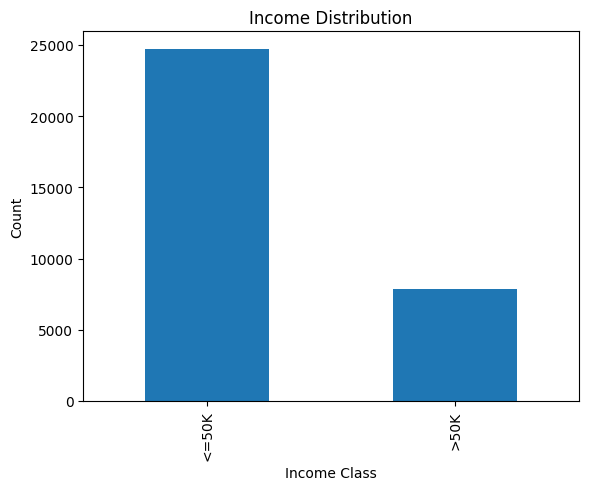

In [ ]:
import matplotlib.pyplot as plt

df["income"].value_counts().plot(kind="bar")
plt.title("Income Distribution")
plt.xlabel("Income Class")
plt.ylabel("Count")
plt.show()



In [ ]:
# Impute categorical missing values by replacing '?' with 'Unknown '
df = df.replace("?", "Unknown")

# Reclassify native.country into continents
def group_country(country):
    north_america = ["United-States", "Canada", "Mexico", "Puerto-Rico", "Cuba",
                     "Jamaica", "Haiti", "Dominican-Republic", "Guatemala",
                     "El-Salvador", "Honduras", "Nicaragua", "Trinadad&Tobago"]
    europe = ["England", "Germany", "Italy", "France", "Poland", "Ireland",
              "Portugal", "Greece", "Scotland", "Yugoslavia", "Hungary", "Holand-Netherlands"]
    asia = ["India", "China", "Japan", "Philippines", "Vietnam", "Cambodia",
            "Laos", "Thailand", "Taiwan", "Hong"]
    south_america = ["Columbia", "Ecuador", "Peru"]
    africa = ["Egypt", "South-Africa"]

    if country in north_america:
        return "North America"
    elif country in europe:
        return "Europe"
    elif country in asia:
        return "Asia"
    elif country in south_america:
        return "South America"
    elif country in africa:
        return "Africa"
    elif country == "Unknown":
        return "Unknown"
    else:
        return "Other"

df["native.country.grouped"] = df["native.country"].apply(group_country)


In [ ]:
# Reclassify Education Level Into Groups
def group_education(level):
    no_hs = ["Preschool", "1st-4th", "5th-6th", "7th-8th",
             "9th", "10th", "11th"]
    hs = ["12th", "HS-grad"]
    some_college = ["Some-college", "Assoc-voc", "Assoc-acdm"]
    bachelors = ["Bachelors"]
    advanced = ["Masters", "Doctorate", "Prof-school"]

    if level in no_hs:
        return "No High School Diploma"
    elif level in hs:
        return "High School Graduate"
    elif level in some_college:
        return "Some College/Associates"
    elif level in bachelors:
        return "Bachelors"
    elif level in advanced:
        return "Advanced Degree"
    else:
        return "Other"   # just in case, though all categories are covered

# Apply the grouping
df["education_grouped"] = df["education"].apply(group_education)


In [ ]:
# Reclassify occupation into meaningful groups
def group_occupation(job):
    professional = ["Exec-managerial", "Prof-specialty", "Tech-support"]
    service = ["Protective-serv", "Priv-house-serv", "Other-service", "Armed-Forces", "Healthcare"]
    sales_clerical = ["Sales", "Adm-clerical"]
    trades = ["Craft-repair", "Machine-op-inspct", "Transport-moving"]
    labor_farming = ["Handlers-cleaners", "Farming-fishing"]

    if job in professional:
        return "Professional/Technical/Managerial"
    elif job in service:
        return "Service & Care"
    elif job in sales_clerical:
        return "Sales & Clerical"
    elif job in trades:
        return "Skilled Trades & Machine"
    elif job in labor_farming:
        return "Labor & Farming"
    elif job == "Unknown":
        return "Unknown"
    else:
        return "Other"

# Apply the grouping
df["occupation_grouped"] = df["occupation"].apply(group_occupation)


In [ ]:
# List of categorical variables for dummy coding
categorical_vars = [
    "education_grouped", "marital.status",
    "occupation_grouped", "relationship", "race", "sex", "native.country.grouped"
]

df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)


df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)



# Apply dummy coding, drop_first=True ensures one reference category is left out
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Check the new dataset shape and sample columns
print("New dataset shape:", df_encoded.shape)
print("\nSample columns after encoding:")
print(df_encoded.columns[:20])  # just to preview first 20 columns


New dataset shape: (32561, 38)

Sample columns after encoding:
Index(['age', 'education', 'occupation', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country', 'income',
       'education_grouped_Bachelors', 'education_grouped_High School Graduate',
       'education_grouped_No High School Diploma',
       'education_grouped_Some College/Associates',
       'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_grouped_Professional/Technical/Managerial',
       'occupation_grouped_Sales & Clerical'],
      dtype='object')


In [ ]:
# View the dataset after imputation and dummy coding
df_encoded.head()


,age,education,occupation,capital.gain,capital.loss,hours.per.week,native.country,income,education_grouped_Bachelors,education_grouped_High School Graduate,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country.grouped_Europe,native.country.grouped_North America,native.country.grouped_Other,native.country.grouped_South America,native.country.grouped_Unknown
0,90,HS-grad,Unknown,0,4356,40,United-States,<=50K,False,True,...,False,False,False,True,False,False,True,False,False,False
1,82,HS-grad,Exec-managerial,0,4356,18,United-States,<=50K,False,True,...,False,False,False,True,False,False,True,False,False,False
2,66,Some-college,Unknown,0,4356,40,United-States,<=50K,False,False,...,False,True,False,False,False,False,True,False,False,False
3,54,7th-8th,Machine-op-inspct,0,3900,40,United-States,<=50K,False,False,...,False,False,False,True,False,False,True,False,False,False
4,41,Some-college,Prof-specialty,0,3900,40,United-States,<=50K,False,False,...,False,False,False,True,False,False,True,False,False,False


In [ ]:
# count of the occupation categories after reclassification
df["occupation_grouped"].value_counts()

,count
occupation_grouped,
Professional/Technical/Managerial,9134
Skilled Trades & Machine,7698
Sales & Clerical,7420
Service & Care,4102
Labor & Farming,2364
Unknown,1843


In [ ]:
# count of the education level categories after reclassification
df["education_grouped"].value_counts()

,count
education_grouped,
High School Graduate,10934
Some College/Associates,9740
Bachelors,5355
No High School Diploma,3820
Advanced Degree,2712


In [ ]:
print(df[["age", "capital.gain", "capital.loss", "hours.per.week"]].skew())


age               -0.109084
capital.gain      11.953848
capital.loss       4.594629
hours.per.week    -4.151912
dtype: float64


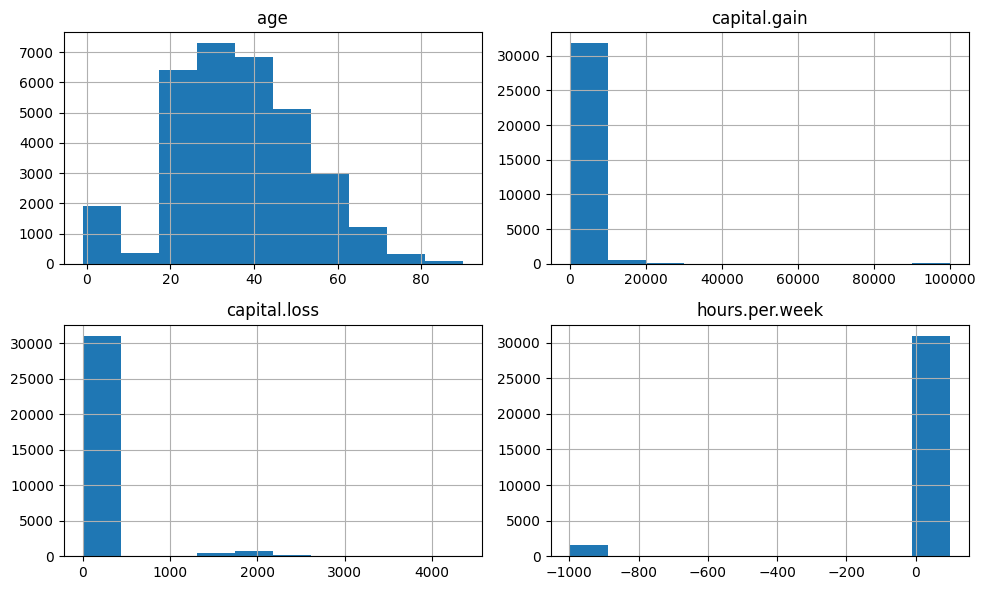

In [ ]:
# Histograms of the numerical variables
df[["age", "capital.gain", "capital.loss", "hours.per.week"]].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()


In [ ]:
# Log Transformation for Capital Loss and Gain
df["capital.gain.log"] = np.log1p(df["capital.gain"])
df["capital.loss.log"] = np.log1p(df["capital.loss"])

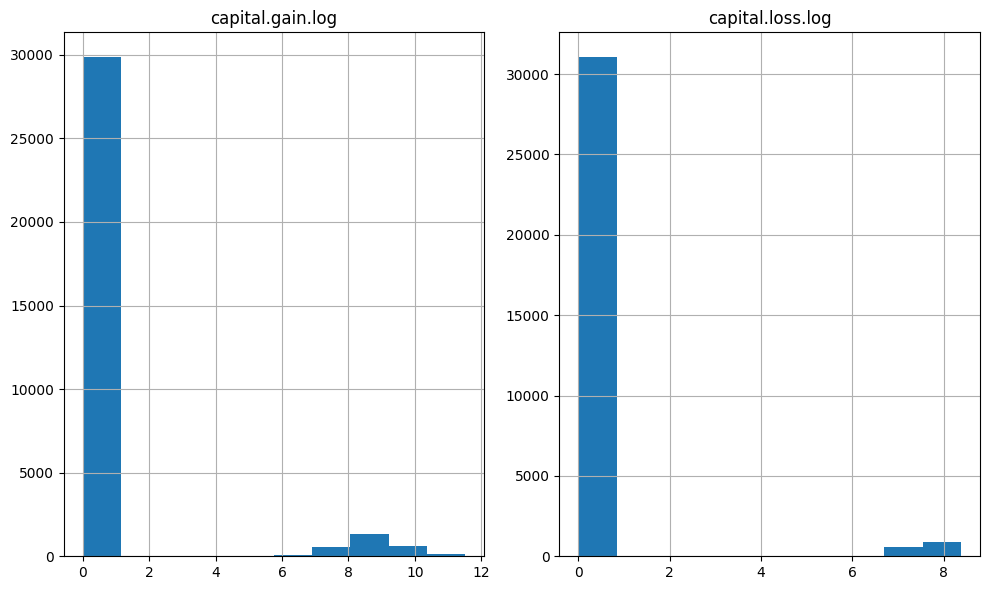

In [ ]:
# New Histograms for Captial loss and gain
df[["capital.gain.log", "capital.loss.log"]].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

In [ ]:
# Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Target variable (income)
y = df_encoded["income"]

# Drop target and the original categorical columns (since I now use grouped/dummies)
X = df_encoded.drop(columns=["income", "education", "occupation", "native.country"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
log_reg = LogisticRegression(max_iter=1000, solver="liblinear")
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[4629  347]
 [ 665  872]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4976
        >50K       0.72      0.57      0.63      1537

    accuracy                           0.84      6513
   macro avg       0.79      0.75      0.77      6513
weighted avg       0.84      0.84      0.84      6513



In [ ]:
# Make a coefficient table with p values
import statsmodels.api as sm

# Convert target variable to numerical (0 and 1)
y_train_numeric = y_train.apply(lambda x: 1 if x == ">50K" else 0)

# Convert boolean columns in X_train to integers
X_train_numeric = X_train.astype(int)

X_train_sm = sm.add_constant(X_train_numeric)
log_reg_sm = sm.Logit(y_train_numeric, X_train_sm).fit()
print(log_reg_sm.summary())

Optimization terminated successfully.
         Current function value: 0.328800
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                26048
Model:                          Logit   Df Residuals:                    26013
Method:                           MLE   Df Model:                           34
Date:                Fri, 19 Sep 2025   Pseudo R-squ.:                  0.4058
Time:                        01:34:38   Log-Likelihood:                -8564.6
converged:                       True   LL-Null:                       -14415.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                   

Confusion Matrix:
 [[4651  325]
 [ 682  855]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4976
        >50K       0.72      0.56      0.63      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513



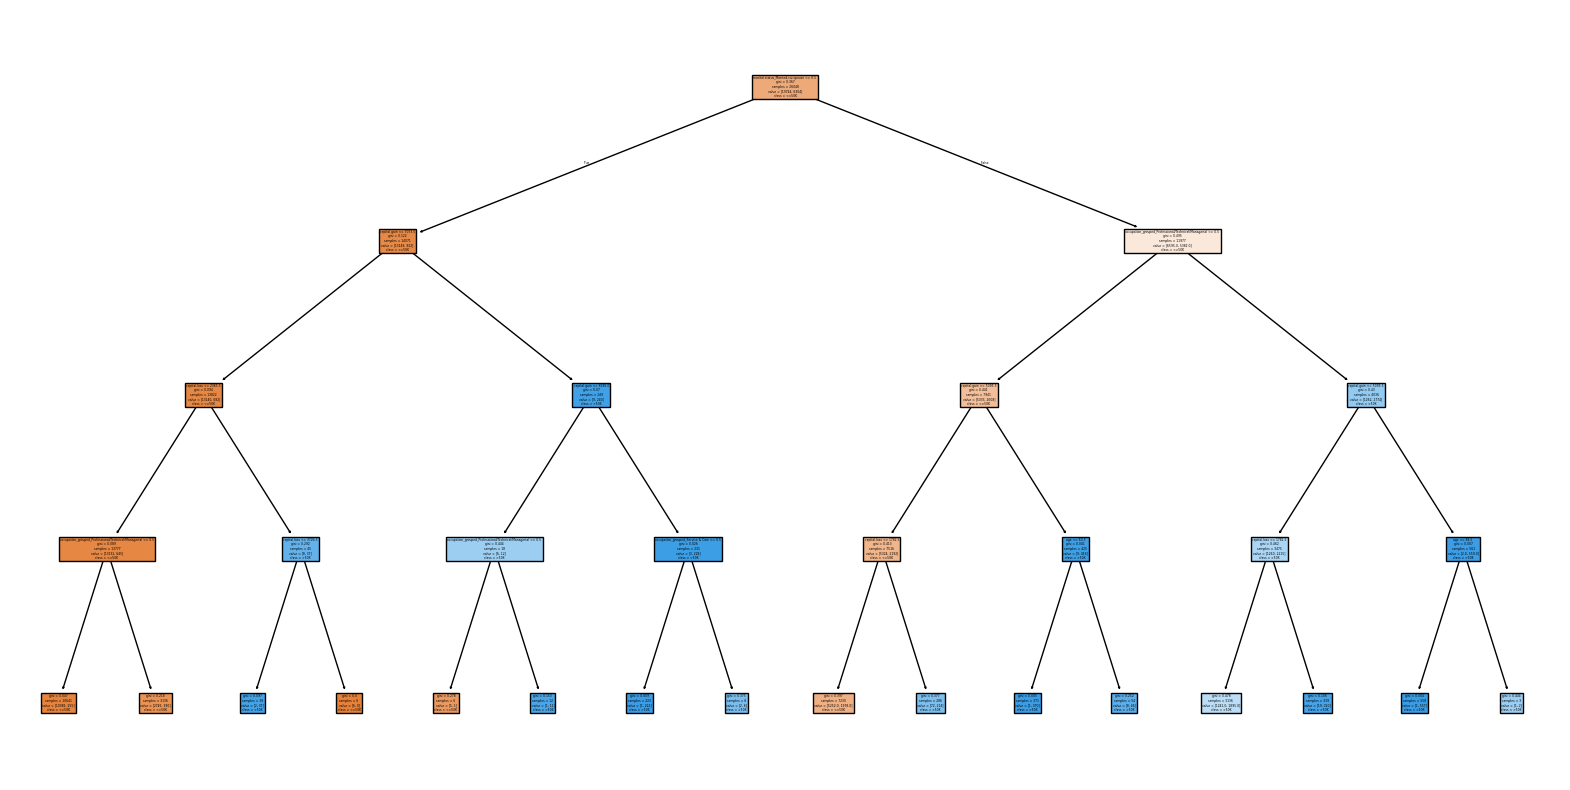

In [ ]:
# Decision Tree Model

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Build and train the model and limit depth so I can see it
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=dt.classes_, filled=True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression scores
log_acc = accuracy_score(y_test, y_pred)
log_prec = precision_score(y_test, y_pred, pos_label=">50K")
log_rec = recall_score(y_test, y_pred, pos_label=">50K")
log_f1 = f1_score(y_test, y_pred, pos_label=">50K")

# Decision Tree scores
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt, pos_label=">50K")
dt_rec = recall_score(y_test, y_pred_dt, pos_label=">50K")
dt_f1 = f1_score(y_test, y_pred_dt, pos_label=">50K")

# Print results
print("Logistic Regression:")
print(f" Accuracy: {log_acc:.3f}, Precision: {log_prec:.3f}, Recall: {log_rec:.3f}, F1: {log_f1:.3f}")

print("\nDecision Tree:")
print(f" Accuracy: {dt_acc:.3f}, Precision: {dt_prec:.3f}, Recall: {dt_rec:.3f}, F1: {dt_f1:.3f}")


Logistic Regression:
 Accuracy: 0.845, Precision: 0.715, Recall: 0.567, F1: 0.633

Decision Tree:
 Accuracy: 0.845, Precision: 0.725, Recall: 0.556, F1: 0.629


Logistic Regression AUC: 0.893
Decision Tree AUC: 0.863


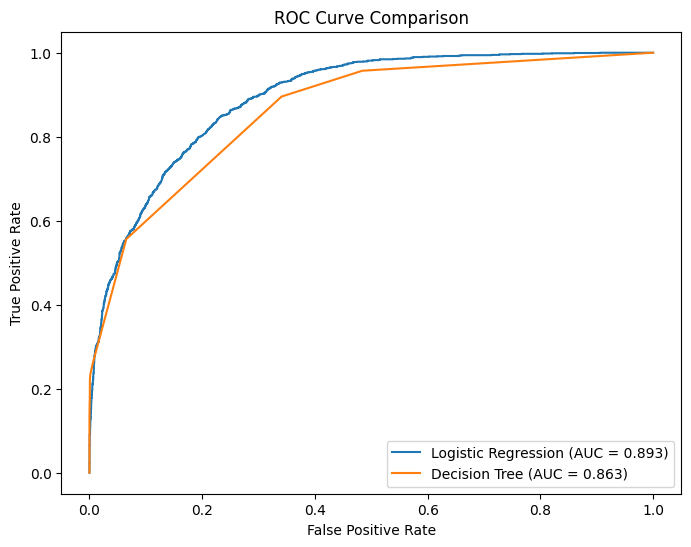

In [ ]:
# Plot a ROC curve and the AUC score to compare both models
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get prediction probabilities
y_prob_log = log_reg.predict_proba(X_test)[:,1]   # logistic regression probs for >50K
y_prob_dt = dt.predict_proba(X_test)[:,1]         # decision tree probs for >50K

# ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log, pos_label=">50K")
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt, pos_label=">50K")

# AUC scores
auc_log = roc_auc_score(y_test, y_prob_log)
auc_dt = roc_auc_score(y_test, y_prob_dt)

print(f"Logistic Regression AUC: {auc_log:.3f}")
print(f"Decision Tree AUC: {auc_dt:.3f}")

# 4. Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
